## About Project
In this project we will predict fraudulent activity in credit card transactions with the help of Machine learning Algorithms.


## About Data
The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

## Scope & Objective
   For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
   
   In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.


## Business Problem Statement

The problem statement chosen for this project is to predict fraudulent credit card transactions with the help of machine learning models. In this project, we will analyse customer-level data that has been collected and analyzed during a research collaboration of World line and the Machine Learning Group.

It has been estimated by Nilson Report that by 2020, banking frauds would account for $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing in new and different ways.


## Data dictionary
The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labeling, and it takes the value of 1 in cases of fraud and 0 in others.

## Preprocessing the Data

#### 1.Importing the requred

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import  RobustScaler
from sklearn.preprocessing import PowerTransformer

In [5]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [6]:
#pip install xgboost

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#pip install imblearn

#pip install -U imbalanced-learn

In [8]:
#pip install imblearn # if you dont have imblearn install it
import math
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

#### 2.Importing the table

In [10]:
df=pd.read_csv("creditcard.csv")
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("Columns names")
print(df.columns)

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

#### 3.Describing data

In [11]:
print("Data Description")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("Number of rows and columns")
print(df.shape)
print("-----------------------------------------------------------------------------------------------")
print("data information")
print(df.info())
print("-----------------------------------------------------------------------------------------------")

Data Description
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.33

In [12]:
print("Data percentaile")
print(df.describe(percentiles=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]))
print("------------ -----------------------------------------------------------------------------------")
print("Checking for null")
print(df.isnull().sum())
#after varyfing the data we found that there is no missing of data
print("there is no null or missing data in the selected sourse")

Data percentaile
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
1%       2422.000000 -6.563199e+00 -4.960300e+00 -3.978377e+00 -3.122987e+00   
2%       5964.120000 -4.757888e+00 -3.419452e+00 -3.192457e+00 -2.742465e+00   
3%      11490.180000 -3.864514e+00 -2.677873e+00 -2.809154e+00 -2.528801e+00   
4%      19880.720000 -3.298547e+00 -2.236980e+00 -2.572682e+00 -2.362446e+00   
5%      25297.600000 -2.899147e+00 -1.971975e+00 -2.389740e+00 -2.195683e+00   
6%      28426.360000 -2.604921e+00 -1.787717e+00 -2.232574e+00 -2.041926e+00   
7%      30660.840000 -2.381382e+00 -1.649294e+00 -2.098802e+00 -1.913953e+00   
8%      32432.000000 -2

#### 4.Checking for Null data and duplicates and removing them

In [13]:
print(df.isnull().any())

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool


In [14]:
print(df.duplicated().any())
print(df[df.duplicated()])

True
            Time        V1        V2        V3        V4        V5        V6  \
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
113         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
114         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
115         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
282987  171288.0  1.912550 -0.455240 -1.750654  0.454324  2.089130  4.160019   
283483  171627.0 -1.464380  1.368119  0.815992 -0.601282 -0.689115 -0.487154   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284193  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   

              V7        V8        

###### There are some duplicates present in this Dataset

##### 4.1 In this we have 1081 duplicate data so we are removing it

In [15]:
print(f"Duplicated {len(df[df.duplicated()])} rows on idx: {list(df[df.duplicated()].index)}")

Duplicated 1081 rows on idx: [33, 35, 113, 114, 115, 221, 223, 1178, 1180, 1382, 1384, 1684, 1686, 2004, 2005, 2006, 2728, 2729, 2731, 2732, 2734, 2735, 2784, 2786, 2998, 3000, 3175, 3177, 3316, 3318, 3321, 3323, 4900, 4902, 5925, 5927, 6411, 6412, 6413, 9027, 9028, 9029, 11132, 11134, 12393, 12394, 12395, 13563, 13564, 13565, 13882, 13883, 13884, 16391, 16393, 17949, 17950, 17951, 18051, 18052, 18053, 18263, 18265, 19617, 19619, 19636, 19638, 19797, 19799, 20418, 20420, 21252, 21254, 21403, 21405, 21676, 21677, 21678, 21683, 21684, 21685, 21966, 21967, 21968, 22476, 22478, 22789, 22791, 23891, 23892, 23893, 24965, 24967, 24992, 24994, 25460, 25461, 25462, 25692, 25694, 26943, 26944, 26946, 26947, 26949, 26950, 27402, 27404, 27776, 27777, 27778, 28543, 28544, 28546, 28547, 28549, 28550, 28644, 28646, 29595, 29597, 30136, 30138, 30671, 30673, 30680, 30682, 31637, 31639, 31848, 31850, 31854, 31856, 31983, 31985, 32955, 32957, 34893, 34929, 34931, 35905, 35907, 36011, 36013, 36209, 36210,

In [16]:
df = df.drop_duplicates(keep='first')
df.reset_index(drop = True, inplace = True)

In [17]:
print(f"Rows, Cols - After: {df.shape[0], df.shape[1]}")

Rows, Cols - After: (283726, 31)


#### Outliers treatment
As the whole dataset is transformed with PCA, so assuming that the outliers are already treated. Hence, we are not performing any outliers treatment on the dataframe, though we still see outliers available

## Visualizeing and Analysing the Data

#### 1.Fraudulent and Non Fraudulent activitys

In [18]:
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100, 2)
print("Non-Fraudulent : {} %".format(normal_share))
print("    Fraudulent : {} %".format(fraud_share))

Non-Fraudulent : 99.83 %
    Fraudulent : 0.17 %


#### 2.Visualizeing Count of Fraudulent and Non Fraudulent activitys preasent in transaction

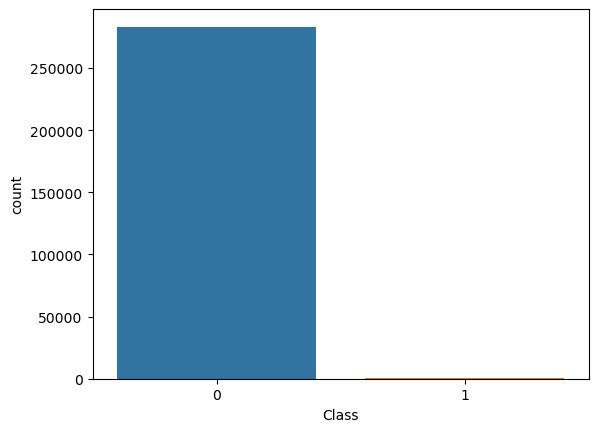

In [19]:
sns.countplot(data=df,x="Class")
plt.show()

##### 3.Created a scatter plot to observe the distribution of classes with time

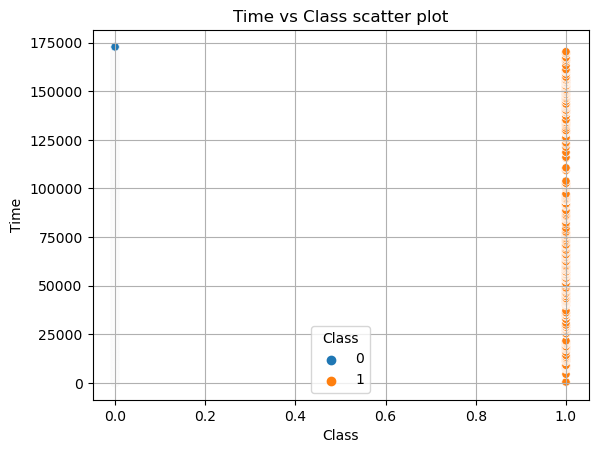

In [20]:
sns.scatterplot( df["Class"],df["Time"],hue=df["Class"])
plt.title("Time vs Class scatter plot")
plt.grid()
plt.show()

#### 4.Create a scatter plot to observe the distribution of classes with Amount

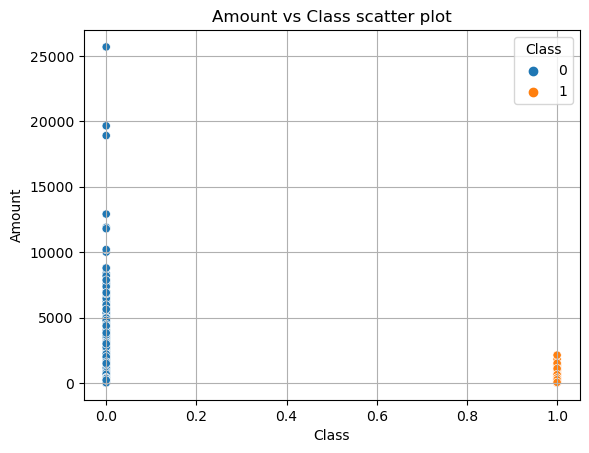

In [21]:
sns.scatterplot(df["Class"],df["Amount"],hue=df["Class"])
plt.title("Amount vs Class scatter plot")
plt.grid()

##### Observation
Clearly low amount transactions are more likely to be fraudulent than high amount transaction

In [22]:
corr=df.corr()
print(corr)

            Time        V1        V2        V3        V4        V5        V6  \
Time    1.000000  0.117927 -0.010556 -0.422054 -0.105845  0.173223 -0.063279   
V1      0.117927  1.000000  0.006875 -0.008112  0.002257 -0.007036  0.000413   
V2     -0.010556  0.006875  1.000000  0.005278 -0.001495  0.005210 -0.000594   
V3     -0.422054 -0.008112  0.005278  1.000000  0.002829 -0.006879 -0.001511   
V4     -0.105845  0.002257 -0.001495  0.002829  1.000000  0.001744 -0.000880   
V5      0.173223 -0.007036  0.005210 -0.006879  0.001744  1.000000 -0.000938   
V6     -0.063279  0.000413 -0.000594 -0.001511 -0.000880 -0.000938  1.000000   
V7      0.085335 -0.009173  0.007425 -0.011721  0.004657 -0.008709  0.000436   
V8     -0.038203 -0.001168  0.002899 -0.001815  0.000890  0.001430  0.003036   
V9     -0.007861  0.001828 -0.000274 -0.003579  0.002154 -0.001213 -0.000734   
V10     0.031068  0.000815  0.000620 -0.009632  0.002753 -0.006050 -0.002180   
V11    -0.248536  0.001028 -0.000633  0.

#### 5.Plotting the correlation matrix

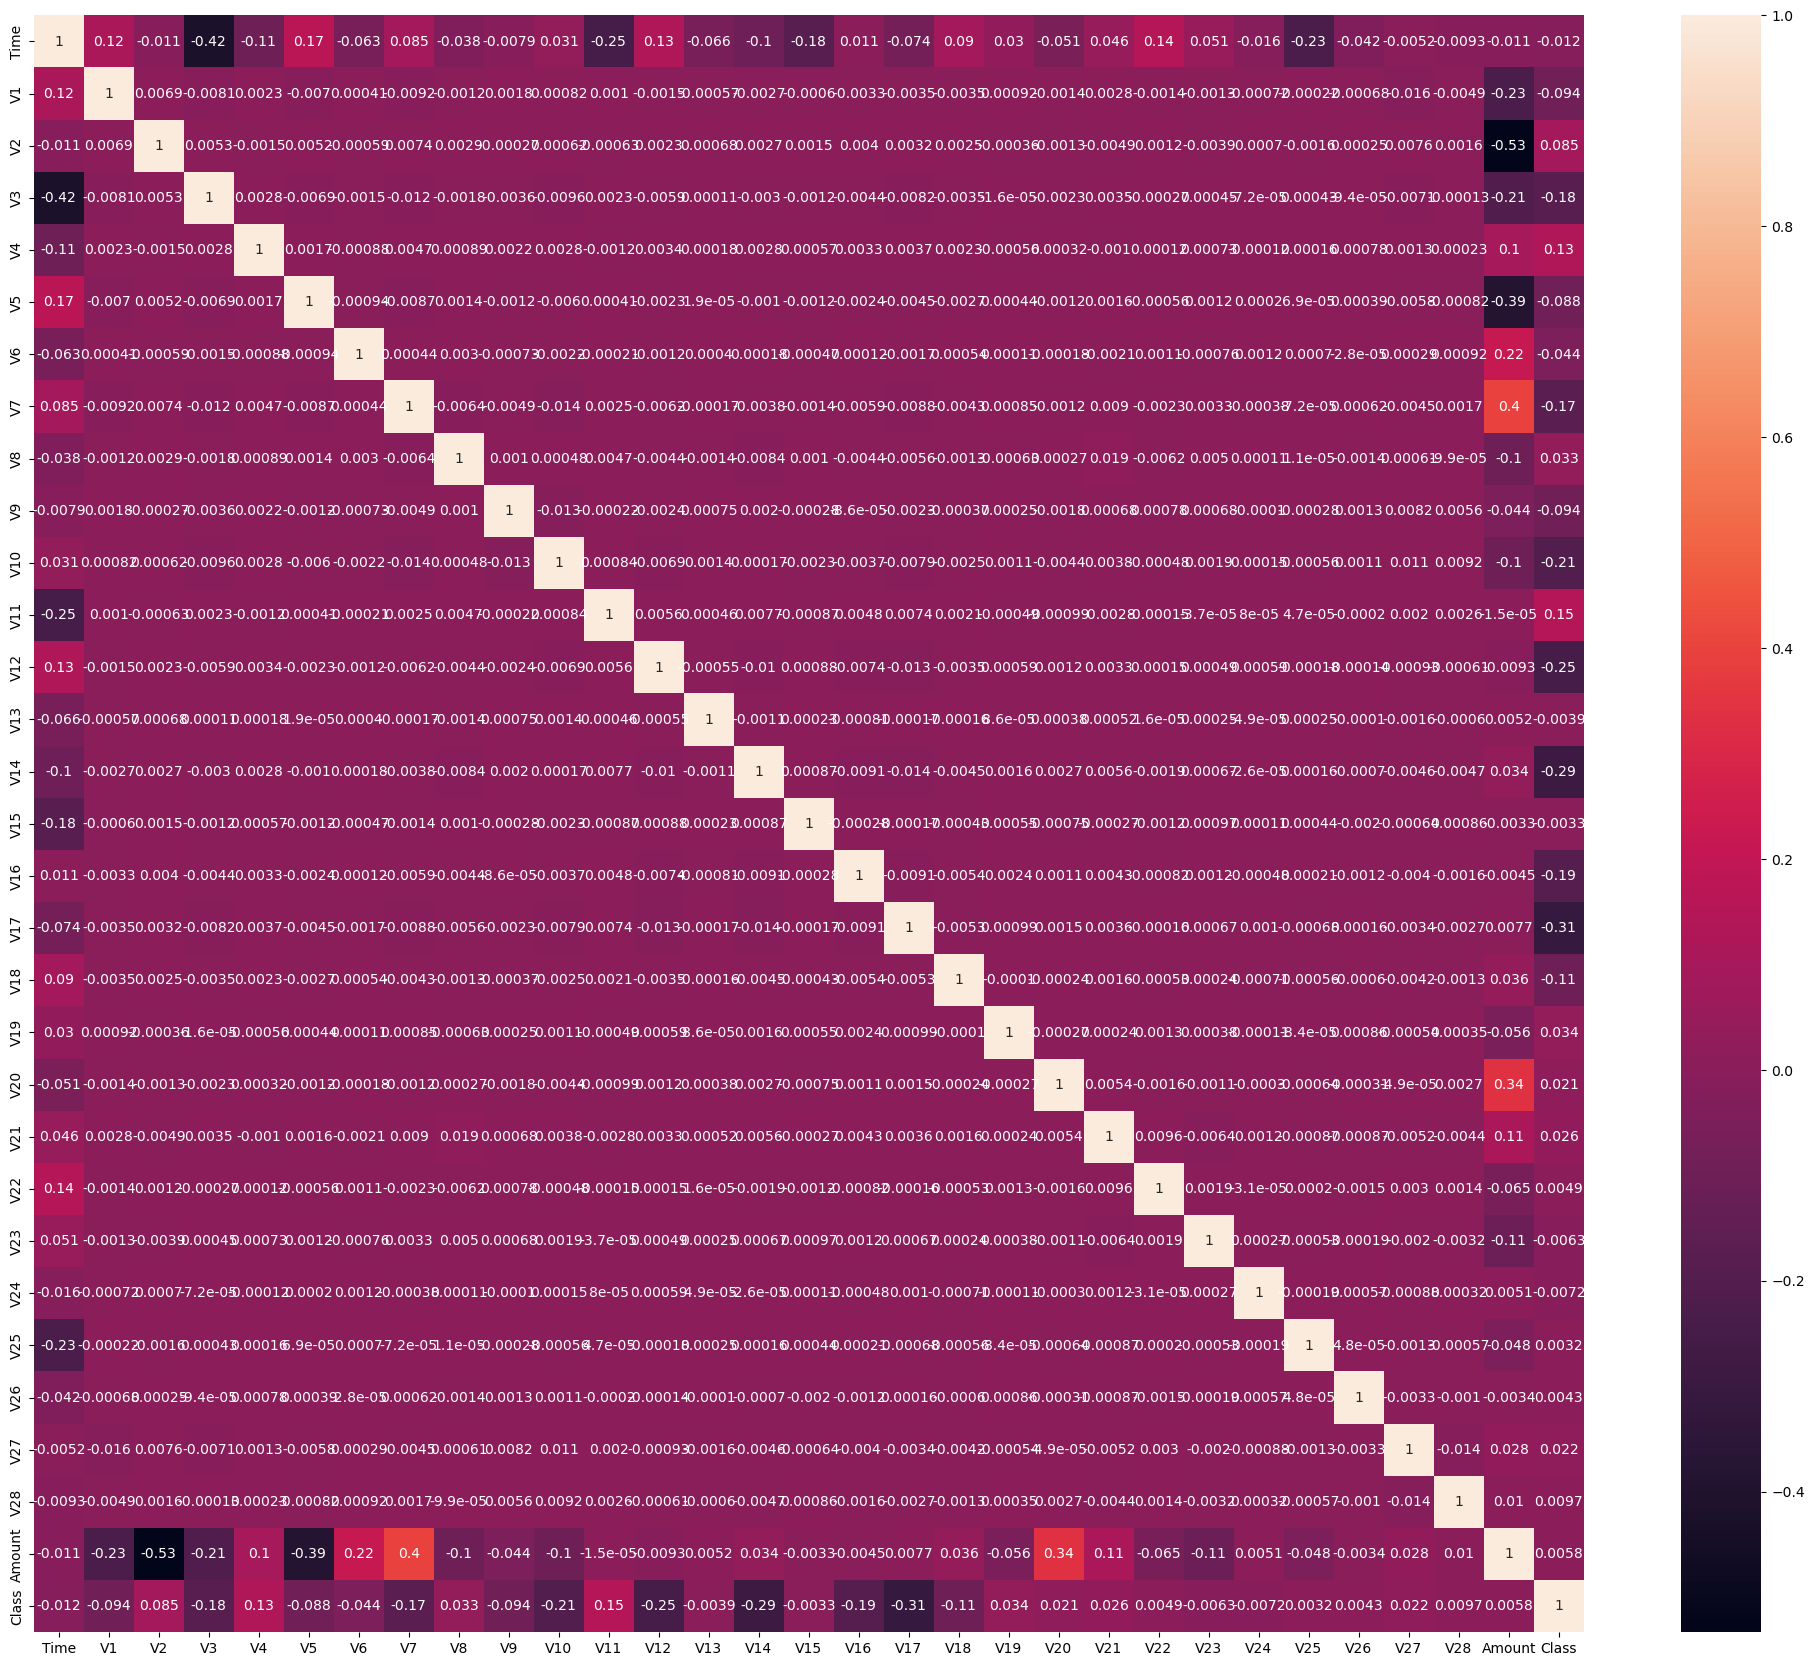

In [23]:
plt.figure(figsize=[25,21])
sns.heatmap(data=corr,annot=True)
plt.show()

#### 6.Plotting all the variable in displot to visualise the distribution

<Figure size 640x480 with 0 Axes>

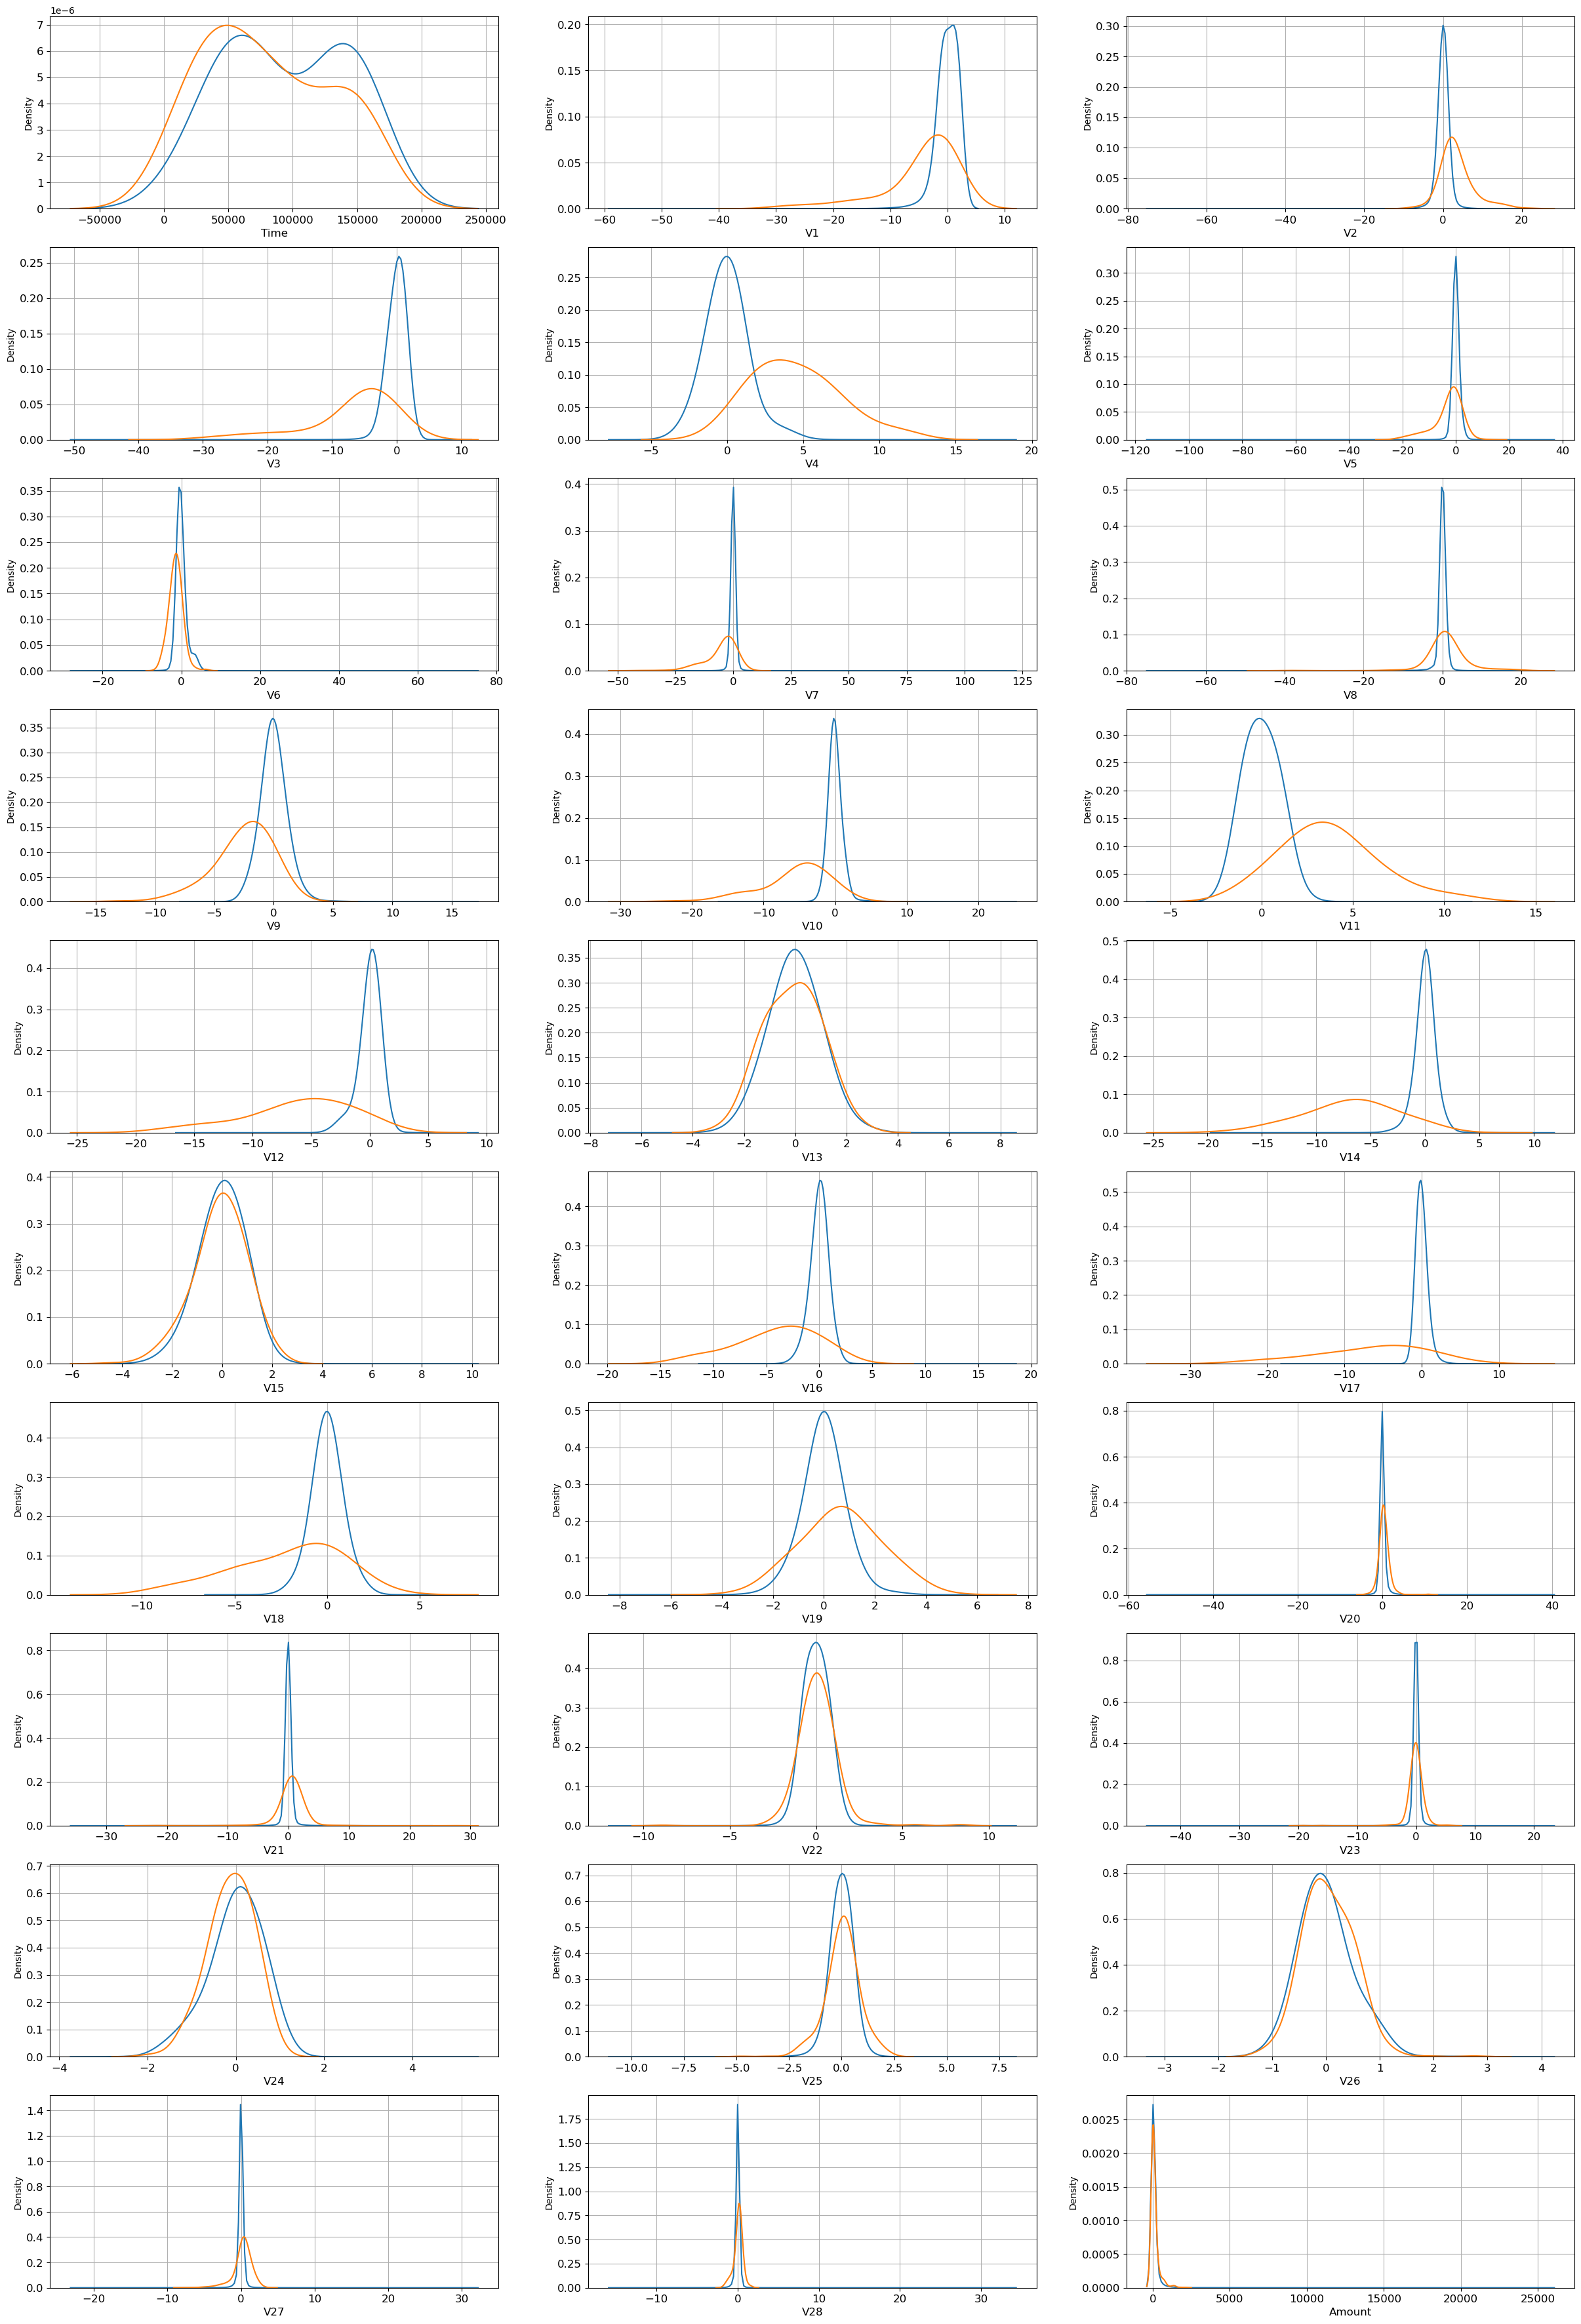

In [24]:
var = list(df.columns.values)
var.remove("Class") # dropping Class columns from the list

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(10,3,figsize=(30,45));

for feature in var:
    i += 1
    plt.subplot(10,3,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.grid()
plt.show()

##### Observation
We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.

#### 7. Droping Time column
We are droping the “Time” column as it is irrelevant and this feature is not going to help in the model building becouse the time in not gona make fraud transaction only the activity makes it, get into the core of banking.

In [25]:
df = df.drop("Time", axis = 1)
print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

#### 8.Visualizeing how the plots lay on V15 and V26 becouse we can see the relation on density of them in above graph

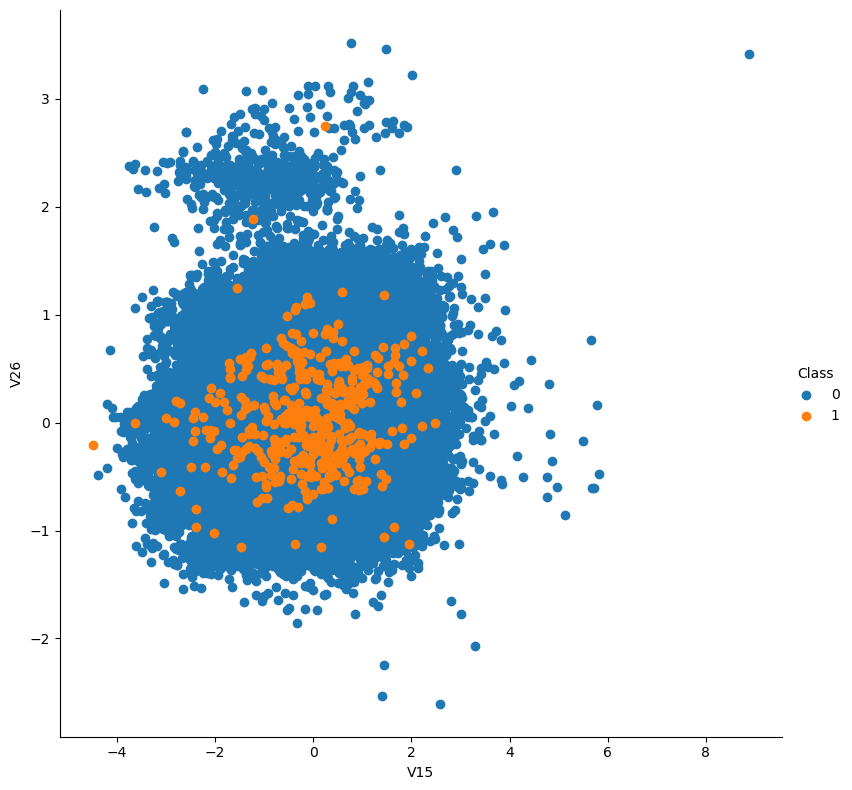

In [26]:
sns.FacetGrid(df,hue="Class",size=8).map(plt.scatter,"V15","V26").add_legend();
plt.show()

#### 9. Number of Fraudulent

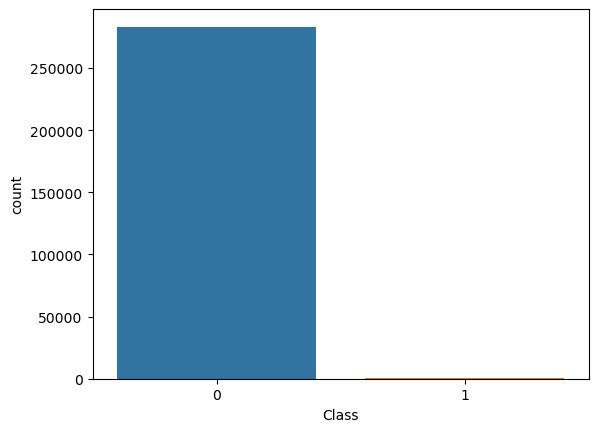

In [27]:
sns.countplot(data=df,x="Class")
plt.show()

In [28]:
print(df["Class"].value_counts())

0    283253
1       473
Name: Class, dtype: int64


##### Note:-
Now we can see the data is highly Imbalanced

In Conclusion, everyone should know that the overall performance of ML models built on imbalanced datasets, will be constrained by its ability to predict rare and minority points. Identifying and resolving the imbalance of those points is crucial to the quality and performance of the generated models.

To handle that we are going to use SMOTE

### Smote
SMOTE stands for Synthetic Minority Oversampling Technique. The method was proposed in a 2002 paper in the Journal of Artificial Intelligence Research. SMOTE is an improved method of dealing with imbalanced data in classification problems.

As an example, imagine a data set about sales of a new product for mountain sports. For simplicity, let’s say that the website sells to two types of clients: skiers and climbers.

For each visitor, we also record whether the visitor buys the new mountain product. Imagine that we want to make a classification model that allows us to use customer data to make a prediction of whether the visitor will buy the new product.

Most e-commerce shoppers do not buy: often, many come for looking at products and only a small percentage of visitors actually buy something. Our data set will be imbalanced, because we have a huge number of non-buyers and a very small number of buyers.

#### 10. Doing scalling to get better results

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_df = df
scaled_df = pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

#### 11.Seperating Dependent and Indipendent Feature

In [30]:
x=scaled_df.drop("Class",axis=1)

In [31]:
y=scaled_df.loc[:,("Class")]

In [32]:
print(x)

              V1        V2        V3        V4        V5        V6        V7  \
0       0.935192  0.766490  0.881365  0.313023  0.763439  0.267669  0.266815   
1       0.978542  0.770067  0.840298  0.271796  0.766120  0.262192  0.264875   
2       0.935217  0.753118  0.868141  0.268766  0.762329  0.281122  0.270177   
3       0.941878  0.765304  0.868484  0.213661  0.765647  0.275559  0.266803   
4       0.938617  0.776520  0.864251  0.269796  0.762975  0.263984  0.268968   
...          ...       ...       ...       ...       ...       ...       ...   
283721  0.756448  0.873531  0.666991  0.160317  0.729603  0.236810  0.235393   
283722  0.945845  0.766677  0.872678  0.219189  0.771561  0.273661  0.265504   
283723  0.990905  0.764080  0.781102  0.227202  0.783425  0.293496  0.263547   
283724  0.954209  0.772856  0.849587  0.282508  0.763172  0.269291  0.261175   
283725  0.949232  0.765256  0.849601  0.229488  0.765632  0.256488  0.274963   

              V8        V9       V10  .

In [33]:
y=pd.DataFrame(y)
y.columns=["Class"]
print(y)

        Class
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
...       ...
283721    0.0
283722    0.0
283723    0.0
283724    0.0
283725    0.0

[283726 rows x 1 columns]


In [34]:
print(y.value_counts())

Class
0.0      283253
1.0         473
dtype: int64


#### 12.Implementing with SMOTE

In [35]:
#pip install imbalanced-learn

In [36]:
import imblearn

In [37]:
print(imblearn.__version__)

0.9.1


In [38]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

In [39]:
sm=SMOTE(random_state=14, sampling_strategy=1)

In [40]:
x_res,y_res=sm.fit_resample(x,y)

In [41]:
print("total columns and rows in x",x_res.shape)
print("total columns and rows in y",y_res.shape)
print("total value counts in our target variable",y_res.value_counts())

total columns and rows in x (566506, 29)
total columns and rows in y (566506, 1)
total value counts in our target variable Class
0.0      283253
1.0      283253
dtype: int64


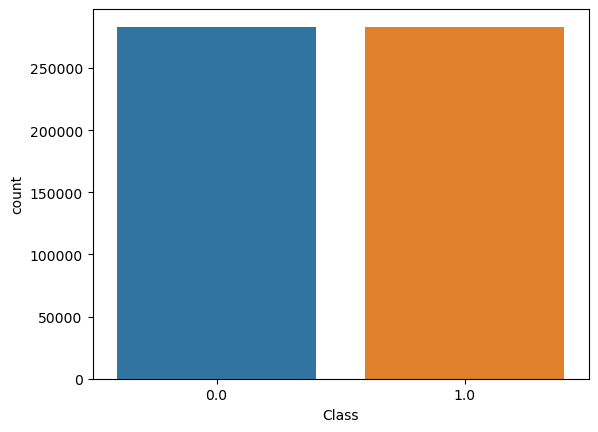

In [42]:
sns.countplot(data=y_res,x="Class")
plt.show()

##### Note
Now we can see our target variable it gets balanced

#### 13.Spliting training and testing daa

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res,test_size=0.25,random_state=0)

In [44]:
y_test.value_counts()

Class
1.0      71091
0.0      70536
dtype: int64

## Predection 1

#### 1.Using Random forest

Random forest is used on the job by data scientists in many industries including banking, stock trading, medicine, and e-commerce. It's used to predict the things which help these industries run efficiently, such as customer activity, patient history, and safety.

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model

In [46]:
cls = RandomForestClassifier(n_estimators=100, random_state=0)

In [47]:
cls.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [48]:
pred = cls.predict(x_test)

In [49]:
print(pred)

[0. 1. 0. ... 0. 0. 1.]


In [50]:
pred=pd.DataFrame(pred)

In [51]:
print(pred)

          0
0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
...     ...
141622  1.0
141623  0.0
141624  0.0
141625  0.0
141626  1.0

[141627 rows x 1 columns]


In [52]:
pred=pd.DataFrame(pred)
print(pred.head())
y_test=np.array(y_test)
y_test=pd.DataFrame(y_test)
print(y_test.head())

     0
0  0.0
1  1.0
2  0.0
3  1.0
4  0.0
     0
0  0.0
1  1.0
2  0.0
3  1.0
4  0.0


In [53]:
y_test.columns=["Actual"]
pred.columns=["Predection"]

In [54]:
ps=pd.DataFrame()
ps["pred"]=pred.Predection
ps["Actual"]=y_test.Actual
print(ps.head())

   pred  Actual
0   0.0     0.0
1   1.0     1.0
2   0.0     0.0
3   1.0     1.0
4   0.0     0.0


#### 2.Analysing the predected Random forest values

In [55]:
print(ps["pred"].value_counts())

1.0    71116
0.0    70511
Name: pred, dtype: int64


In [56]:
print(ps["Actual"].value_counts())

1.0    71091
0.0    70536
Name: Actual, dtype: int64


#### 3.Mean square error

In [57]:
Mean_Sq_Error1=((ps["pred"])-(ps["Actual"]))
Mean_Sq_Error2=((Mean_Sq_Error1)**2)
Mean_Sq_Error_cls=Mean_Sq_Error2.sum()
print("Mean_Sq_Error for random forest classifier =",Mean_Sq_Error_cls)

Mean_Sq_Error for random forest classifier = 25.0


#### 4.Model score

In [58]:
scoreOfModel1_cls = cls.score(x_test,y_test)
print(scoreOfModel1_cls)

0.9998234799861608


#### 5.Confusion_Matrix

In [59]:
y_test_RFC=ps["Actual"]
y_pred_RFC=ps["pred"]

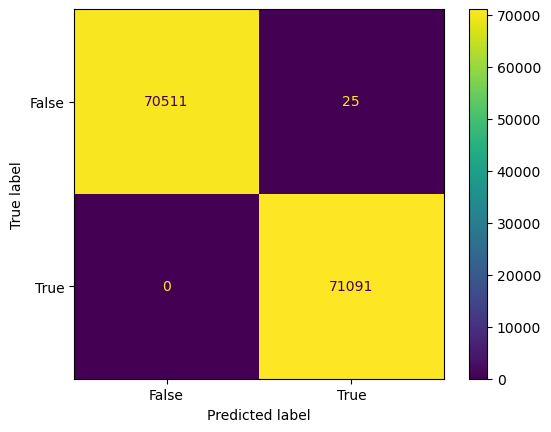

In [60]:
from sklearn import metrics
import matplotlib.pyplot as plt
def display_confusion_matrix(y_test_RFC,y_pred_RFC):
    matrix = metrics.confusion_matrix(y_test_RFC,y_pred_RFC)
    matrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
    matrixDisplay.plot()
    plt.show()
display_confusion_matrix(y_test_RFC,y_pred_RFC)

In [61]:
 print(classification_report(y_test_RFC,y_pred_RFC))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     70536
         1.0       1.00      1.00      1.00     71091

    accuracy                           1.00    141627
   macro avg       1.00      1.00      1.00    141627
weighted avg       1.00      1.00      1.00    141627



#### 6.Error Percentage

In [62]:
a=(ps.shape)
b=pd.DataFrame(a)
c=b.head(1)
c=np.array(c)
Error_Percentage_cls=(Mean_Sq_Error_cls/(np.array(c))*100)
print("Error occured in Randoem forest classifier =",Error_Percentage_cls,"%")

Error occured in Randoem forest classifier = [[0.017652]] %


#### 7.Result percentage

In [63]:
print("Result Percentage=",(100-Error_Percentage_cls),"%")

Result Percentage= [[99.982348]] %


#### 8.Conclusion
Now we can see the results of RF model of 99.98234% accurate

## Predection 2

#### 1. Using XGBoost

The XGBoost (eXtreme Gradient Boosting) is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm that attempts to accurately predict a target variable by combining an ensemble of estimates from a set of simpler and weaker models.

In [64]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100, random_state=0)

In [65]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [66]:
xgb_pred = xgb.predict(x_test)

In [67]:
print(xgb_pred)

[0 1 0 ... 0 0 1]


In [68]:
xgb_pred=pd.DataFrame(xgb_pred)
print(xgb_pred)

        0
0       0
1       1
2       0
3       1
4       0
...    ..
141622  1
141623  0
141624  0
141625  0
141626  1

[141627 rows x 1 columns]


In [69]:
xgb_pred=pd.DataFrame(xgb_pred)
print(xgb_pred.head())
y_test_xgb=np.array(y_test)
y_test_xgb=pd.DataFrame(y_test)
print(y_test_xgb.head())

   0
0  0
1  1
2  0
3  1
4  0
   Actual
0     0.0
1     1.0
2     0.0
3     1.0
4     0.0


In [70]:
y_test_xgb.columns=["Actual"]
xgb_pred.columns=["Predection"]

In [71]:
xgb_ps=pd.DataFrame()
xgb_ps["pred"]=xgb_pred.Predection

In [72]:
xgb_ps["Actual"]=y_test_xgb.Actual
print(xgb_ps.head())

   pred  Actual
0     0     0.0
1     1     1.0
2     0     0.0
3     1     1.0
4     0     0.0


#### 2.Analysing the predected XG Boosting values

In [73]:
print(xgb_ps["pred"].value_counts())

1    71136
0    70491
Name: pred, dtype: int64


In [74]:
print(xgb_ps["Actual"].value_counts())

1.0    71091
0.0    70536
Name: Actual, dtype: int64


#### 3.Mean square error

In [75]:
Mean_Sq_Error1=((xgb_ps["pred"])-(xgb_ps["Actual"]))
Mean_Sq_Error2=((Mean_Sq_Error1)**2)
Mean_Sq_Error_xgb=Mean_Sq_Error2.sum()
print("Mean_Sq_Error for random forest classifier =",Mean_Sq_Error_xgb)

Mean_Sq_Error for random forest classifier = 45.0


#### 4.Model score

In [76]:
scoreOfModel1_xgb = xgb.score(x_test,y_test)
print(scoreOfModel1_xgb)

0.9996822639750895


#### 5.Confusion_Matrix

In [77]:
y_test_xgb=xgb_ps["Actual"]
y_pred_xgb=xgb_ps["pred"]

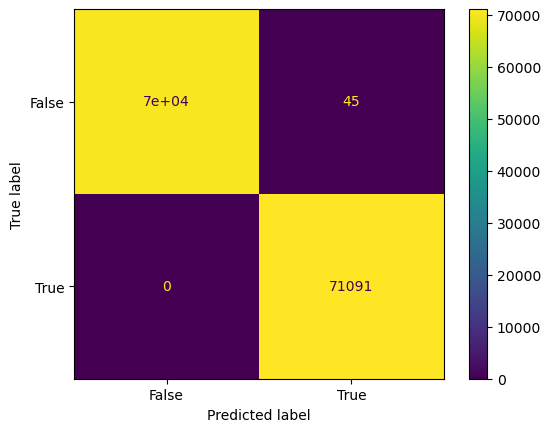

In [78]:
from sklearn import metrics
import matplotlib.pyplot as plt
def display_confusion_matrix(y_test_xgb,y_pred_xgb):
    matrix = metrics.confusion_matrix(y_test_xgb,y_pred_xgb)
    matrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
    matrixDisplay.plot()
    plt.show()
display_confusion_matrix(y_test_xgb,y_pred_xgb)

In [79]:
 print(classification_report(y_test_xgb,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     70536
         1.0       1.00      1.00      1.00     71091

    accuracy                           1.00    141627
   macro avg       1.00      1.00      1.00    141627
weighted avg       1.00      1.00      1.00    141627



#### 6.Error Percentage

In [80]:
a=(xgb_ps.shape)
b=pd.DataFrame(a)
c=b.head(1)
c=np.array(c)
Error_Percentage_xgb=(Mean_Sq_Error_xgb/(np.array(c))*100)
print("Error occured in XG boosting =",Error_Percentage_xgb,"%")

Error occured in XG boosting = [[0.0317736]] %


#### 7.Result Percentage

In [81]:
print("Result Percentage=",(100-Error_Percentage_xgb),"%")

Result Percentage= [[99.9682264]] %


#### 8.Conclusion
Now we can see the results of XGB model of 99.96822% accurate, It is little lower than RF model

## Predection 3

#### 1.Using Ada Boost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
abc =AdaBoostClassifier(n_estimators=50,learning_rate=1, random_state=0)

In [84]:
adb = abc.fit(x_train, y_train)

In [85]:
adb_pred = adb.predict(x_test)

In [86]:
print(adb_pred)

[0. 1. 0. ... 0. 0. 1.]


In [87]:
adb_pred=pd.DataFrame(adb_pred)
print(adb_pred)

          0
0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
...     ...
141622  1.0
141623  0.0
141624  0.0
141625  0.0
141626  1.0

[141627 rows x 1 columns]


In [88]:
adb_pred=pd.DataFrame(adb_pred)
print(adb_pred.head())
y_test_adb=np.array(y_test)
y_test_adb=pd.DataFrame(y_test)
print(y_test_adb.head())

     0
0  0.0
1  1.0
2  0.0
3  0.0
4  0.0
   Actual
0     0.0
1     1.0
2     0.0
3     1.0
4     0.0


In [89]:
y_test_adb.columns=["Actual"]
adb_pred.columns=["Predection"]

In [90]:
adb_ps=pd.DataFrame()
adb_ps["pred"]=adb_pred.Predection

In [91]:
adb_ps["Actual"]=y_test_adb.Actual
print(adb_ps.head())

   pred  Actual
0   0.0     0.0
1   1.0     1.0
2   0.0     0.0
3   0.0     1.0
4   0.0     0.0


#### 2.Analysing the predected ADB Gradient boosting classifier values

In [92]:
print(adb_ps["pred"].value_counts())

0.0    72144
1.0    69483
Name: pred, dtype: int64


In [93]:
print(adb_ps["Actual"].value_counts())

1.0    71091
0.0    70536
Name: Actual, dtype: int64


#### 3.Mean square error

In [94]:
Mean_Sq_Error1=((adb_ps["pred"])-(adb_ps["Actual"]))
Mean_Sq_Error2=((Mean_Sq_Error1)**2)
Mean_Sq_Error_adb=Mean_Sq_Error2.sum()
print("Mean_Sq_Error for Adb Gradient boosting classifier =",Mean_Sq_Error_adb)

Mean_Sq_Error for Adb Gradient boosting classifier = 5050.0


#### 4.Model score

In [95]:
scoreOfModel1_adb = abc.score(x_test,y_test)
print(scoreOfModel1_adb)

0.9643429572044878


#### 5.Confusion_Matrix

In [96]:
y_test_adb=adb_ps["Actual"]
y_pred_adb=adb_ps["pred"]

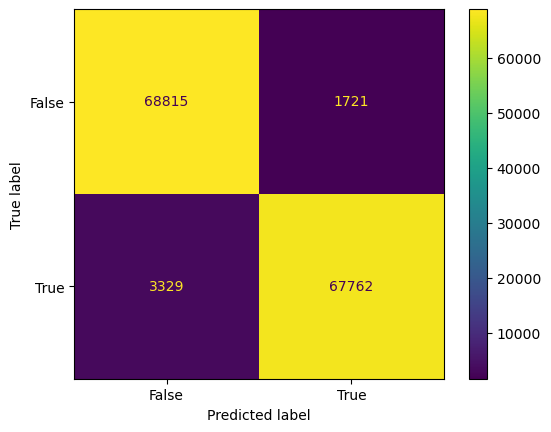

In [97]:
from sklearn import metrics
import matplotlib.pyplot as plt
def display_confusion_matrix(y_test_adb,y_pred_adb):
    matrix = metrics.confusion_matrix(y_test_adb,y_pred_adb)
    matrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
    matrixDisplay.plot()
    plt.show()
display_confusion_matrix(y_test_adb,y_pred_adb)

In [98]:
 print(classification_report(y_test_adb,y_pred_adb))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96     70536
         1.0       0.98      0.95      0.96     71091

    accuracy                           0.96    141627
   macro avg       0.96      0.96      0.96    141627
weighted avg       0.96      0.96      0.96    141627



#### 6.Error Percentage

In [99]:
a=(adb_ps.shape)
b=pd.DataFrame(a)
c=b.head(1)
c=np.array(c)
Error_Percentage_adb=(Mean_Sq_Error_adb/(np.array(c))*100)
print("Error occured in adb boosting =",Error_Percentage_adb,"%")

Error occured in adb boosting = [[3.56570428]] %


#### 7.Result Percentage

In [100]:
print("Result Percentage=",(100-Error_Percentage_adb),"%")

Result Percentage= [[96.43429572]] %


#### 8.Conclusion
Take a look of the results of ADB boosting model of 96.434295% accurate, It is little lower than Above two predection models

## Predection 4

#### 1.Using K Nereast Neighbors Classifier

The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn=KNeighborsClassifier()

In [103]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [104]:
knn_pred = knn.predict(x_test)

In [105]:
print(knn_pred)

[0. 1. 0. ... 0. 0. 1.]


In [106]:
knn_pred=pd.DataFrame(knn_pred)
print(knn_pred)

          0
0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
...     ...
141622  1.0
141623  0.0
141624  0.0
141625  0.0
141626  1.0

[141627 rows x 1 columns]


In [107]:
knn_pred=pd.DataFrame(knn_pred)
print(knn_pred.head())
y_test_knn=np.array(y_test)
y_test_knn=pd.DataFrame(y_test)
print(y_test_knn.head())

     0
0  0.0
1  1.0
2  0.0
3  1.0
4  0.0
   Actual
0     0.0
1     1.0
2     0.0
3     1.0
4     0.0


In [108]:
y_test_knn.columns=["Actual"]
knn_pred.columns=["Predection"]

In [109]:
knn_ps=pd.DataFrame()
knn_ps["pred"]=knn_pred.Predection

In [110]:
knn_ps["Actual"]=y_test_knn.Actual
print(knn_ps.head())

   pred  Actual
0   0.0     0.0
1   1.0     1.0
2   0.0     0.0
3   1.0     1.0
4   0.0     0.0


#### 2.Analysing the predected KNN

In [111]:
print(knn_ps["pred"].value_counts())

1.0    71226
0.0    70401
Name: pred, dtype: int64


In [112]:
print(knn_ps["Actual"].value_counts())

1.0    71091
0.0    70536
Name: Actual, dtype: int64


#### 3.Mean square error

In [113]:
Mean_Sq_Error1=((knn_ps["pred"])-(knn_ps["Actual"]))
Mean_Sq_Error2=((Mean_Sq_Error1)**2)
Mean_Sq_Error_knn=Mean_Sq_Error2.sum()
print("Mean_Sq_Error for KNN classifier =",Mean_Sq_Error_knn)

Mean_Sq_Error for KNN classifier = 135.0


#### 4.Model score

In [114]:
scoreOfModel1_knn = knn.score(x_test,y_test)
print(scoreOfModel1_knn)

0.9990467919252685


#### 5.Confusion_Matrix

In [115]:
y_test_knn=knn_ps["Actual"]
y_pred_knn=knn_ps["pred"]

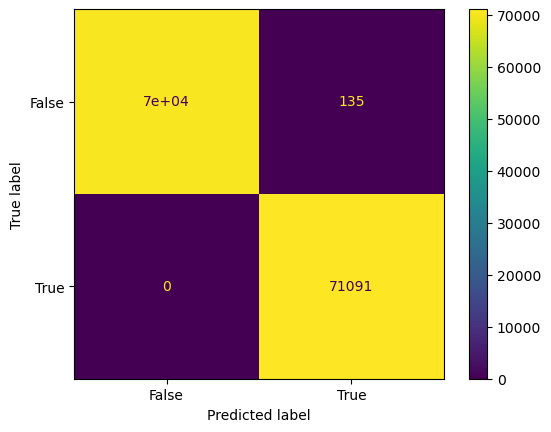

In [116]:
from sklearn import metrics
import matplotlib.pyplot as plt
def display_confusion_matrix(y_test_knn,y_pred_knn):
    matrix = metrics.confusion_matrix(y_test_knn,y_pred_knn)
    matrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
    matrixDisplay.plot()
    plt.show()
display_confusion_matrix(y_test_knn,y_pred_knn)

In [117]:
 print(classification_report(y_test_knn,y_pred_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     70536
         1.0       1.00      1.00      1.00     71091

    accuracy                           1.00    141627
   macro avg       1.00      1.00      1.00    141627
weighted avg       1.00      1.00      1.00    141627



#### 6.Error Percentage

In [118]:
a=(knn_ps.shape)
b=pd.DataFrame(a)
c=b.head(1)
c=np.array(c)
Error_Percentage_knn=(Mean_Sq_Error_knn/(np.array(c))*100)
print("Error occured in KNN Clasifier =",Error_Percentage_knn,"%")

Error occured in KNN Clasifier = [[0.09532081]] %


#### 7.Result Percentage

In [119]:
print("Result Percentage=",(100-Error_Percentage_knn),"%")

Result Percentage= [[99.90467919]] %


#### 8.Conclusion
Well the results of KNN clasifier model is quite good of 99.904679% accurate, but not as good as Random forest classifier model

## Predection 5

#### 1. usingCat boosting

In CatBoost, symmetric trees, or balanced trees, refer to the splitting condition being consistent across all nodes at the same depth of the tree. LightGBM and XGBoost, on the other hand, results in asymmetric trees, meaning splitting condition for each node across the same depth can differ.

In [120]:
#pip install catboost

In [121]:
from catboost import CatBoostClassifier

In [122]:
cbc = CatBoostClassifier(
    learning_rate=0.1, 
)

In [123]:
cbc.fit(x_train,y_train)

0:	learn: 0.5033341	total: 676ms	remaining: 11m 15s
1:	learn: 0.3956935	total: 970ms	remaining: 8m 4s
2:	learn: 0.3132168	total: 1.27s	remaining: 7m 1s
3:	learn: 0.2578766	total: 1.54s	remaining: 6m 23s
4:	learn: 0.2118644	total: 1.86s	remaining: 6m 10s
5:	learn: 0.1840176	total: 2.15s	remaining: 5m 56s
6:	learn: 0.1673491	total: 2.41s	remaining: 5m 42s
7:	learn: 0.1533325	total: 2.7s	remaining: 5m 34s
8:	learn: 0.1443765	total: 2.98s	remaining: 5m 28s
9:	learn: 0.1343810	total: 3.27s	remaining: 5m 23s
10:	learn: 0.1268920	total: 3.58s	remaining: 5m 22s
11:	learn: 0.1188018	total: 4.06s	remaining: 5m 34s
12:	learn: 0.1140100	total: 4.47s	remaining: 5m 39s
13:	learn: 0.1092083	total: 4.94s	remaining: 5m 48s
14:	learn: 0.1054809	total: 5.36s	remaining: 5m 51s
15:	learn: 0.0991064	total: 5.88s	remaining: 6m 1s
16:	learn: 0.0967850	total: 6.33s	remaining: 6m 6s
17:	learn: 0.0927375	total: 6.71s	remaining: 6m 6s
18:	learn: 0.0908760	total: 6.97s	remaining: 5m 59s
19:	learn: 0.0871318	total:

158:	learn: 0.0111754	total: 46.8s	remaining: 4m 7s
159:	learn: 0.0110876	total: 47.1s	remaining: 4m 7s
160:	learn: 0.0109743	total: 47.4s	remaining: 4m 6s
161:	learn: 0.0109060	total: 47.6s	remaining: 4m 6s
162:	learn: 0.0107263	total: 47.9s	remaining: 4m 5s
163:	learn: 0.0106466	total: 48.1s	remaining: 4m 5s
164:	learn: 0.0105779	total: 48.4s	remaining: 4m 4s
165:	learn: 0.0104220	total: 48.7s	remaining: 4m 4s
166:	learn: 0.0103349	total: 49s	remaining: 4m 4s
167:	learn: 0.0102088	total: 49.2s	remaining: 4m 3s
168:	learn: 0.0101163	total: 49.5s	remaining: 4m 3s
169:	learn: 0.0100311	total: 49.8s	remaining: 4m 3s
170:	learn: 0.0099793	total: 50s	remaining: 4m 2s
171:	learn: 0.0098931	total: 50.3s	remaining: 4m 2s
172:	learn: 0.0097862	total: 50.5s	remaining: 4m 1s
173:	learn: 0.0096774	total: 50.8s	remaining: 4m 1s
174:	learn: 0.0096072	total: 51.1s	remaining: 4m
175:	learn: 0.0095650	total: 51.3s	remaining: 4m
176:	learn: 0.0094913	total: 51.7s	remaining: 4m
177:	learn: 0.0094109	tot

314:	learn: 0.0051871	total: 1m 26s	remaining: 3m 8s
315:	learn: 0.0051870	total: 1m 26s	remaining: 3m 8s
316:	learn: 0.0051870	total: 1m 27s	remaining: 3m 7s
317:	learn: 0.0051870	total: 1m 27s	remaining: 3m 7s
318:	learn: 0.0051870	total: 1m 27s	remaining: 3m 6s
319:	learn: 0.0051870	total: 1m 27s	remaining: 3m 6s
320:	learn: 0.0051870	total: 1m 27s	remaining: 3m 5s
321:	learn: 0.0051870	total: 1m 27s	remaining: 3m 5s
322:	learn: 0.0051870	total: 1m 28s	remaining: 3m 4s
323:	learn: 0.0051870	total: 1m 28s	remaining: 3m 4s
324:	learn: 0.0051869	total: 1m 28s	remaining: 3m 3s
325:	learn: 0.0051869	total: 1m 28s	remaining: 3m 3s
326:	learn: 0.0051869	total: 1m 28s	remaining: 3m 2s
327:	learn: 0.0051869	total: 1m 29s	remaining: 3m 2s
328:	learn: 0.0051869	total: 1m 29s	remaining: 3m 1s
329:	learn: 0.0051869	total: 1m 29s	remaining: 3m 1s
330:	learn: 0.0051869	total: 1m 29s	remaining: 3m 1s
331:	learn: 0.0051869	total: 1m 29s	remaining: 3m
332:	learn: 0.0051869	total: 1m 29s	remaining: 3m

467:	learn: 0.0043912	total: 2m	remaining: 2m 16s
468:	learn: 0.0043912	total: 2m	remaining: 2m 16s
469:	learn: 0.0043912	total: 2m	remaining: 2m 15s
470:	learn: 0.0043912	total: 2m	remaining: 2m 15s
471:	learn: 0.0043911	total: 2m	remaining: 2m 15s
472:	learn: 0.0043911	total: 2m 1s	remaining: 2m 14s
473:	learn: 0.0043911	total: 2m 1s	remaining: 2m 14s
474:	learn: 0.0043911	total: 2m 1s	remaining: 2m 14s
475:	learn: 0.0043911	total: 2m 1s	remaining: 2m 13s
476:	learn: 0.0043911	total: 2m 1s	remaining: 2m 13s
477:	learn: 0.0043911	total: 2m 2s	remaining: 2m 13s
478:	learn: 0.0043911	total: 2m 2s	remaining: 2m 13s
479:	learn: 0.0043911	total: 2m 2s	remaining: 2m 12s
480:	learn: 0.0043911	total: 2m 2s	remaining: 2m 12s
481:	learn: 0.0043911	total: 2m 2s	remaining: 2m 12s
482:	learn: 0.0043911	total: 2m 3s	remaining: 2m 11s
483:	learn: 0.0043911	total: 2m 3s	remaining: 2m 11s
484:	learn: 0.0043911	total: 2m 3s	remaining: 2m 11s
485:	learn: 0.0043911	total: 2m 3s	remaining: 2m 10s
486:	lea

622:	learn: 0.0038707	total: 2m 33s	remaining: 1m 32s
623:	learn: 0.0038707	total: 2m 33s	remaining: 1m 32s
624:	learn: 0.0038610	total: 2m 33s	remaining: 1m 32s
625:	learn: 0.0038610	total: 2m 34s	remaining: 1m 32s
626:	learn: 0.0038609	total: 2m 34s	remaining: 1m 31s
627:	learn: 0.0038609	total: 2m 34s	remaining: 1m 31s
628:	learn: 0.0038609	total: 2m 34s	remaining: 1m 31s
629:	learn: 0.0038609	total: 2m 34s	remaining: 1m 31s
630:	learn: 0.0038609	total: 2m 35s	remaining: 1m 30s
631:	learn: 0.0038609	total: 2m 35s	remaining: 1m 30s
632:	learn: 0.0038609	total: 2m 35s	remaining: 1m 30s
633:	learn: 0.0038609	total: 2m 35s	remaining: 1m 29s
634:	learn: 0.0038609	total: 2m 35s	remaining: 1m 29s
635:	learn: 0.0038609	total: 2m 36s	remaining: 1m 29s
636:	learn: 0.0038609	total: 2m 36s	remaining: 1m 29s
637:	learn: 0.0038609	total: 2m 36s	remaining: 1m 28s
638:	learn: 0.0038609	total: 2m 36s	remaining: 1m 28s
639:	learn: 0.0038609	total: 2m 36s	remaining: 1m 28s
640:	learn: 0.0038609	total:

777:	learn: 0.0038432	total: 3m 5s	remaining: 52.9s
778:	learn: 0.0038432	total: 3m 5s	remaining: 52.7s
779:	learn: 0.0038432	total: 3m 5s	remaining: 52.4s
780:	learn: 0.0038432	total: 3m 6s	remaining: 52.2s
781:	learn: 0.0038432	total: 3m 6s	remaining: 51.9s
782:	learn: 0.0038432	total: 3m 6s	remaining: 51.7s
783:	learn: 0.0038432	total: 3m 6s	remaining: 51.4s
784:	learn: 0.0038432	total: 3m 6s	remaining: 51.1s
785:	learn: 0.0038432	total: 3m 6s	remaining: 50.9s
786:	learn: 0.0038432	total: 3m 7s	remaining: 50.6s
787:	learn: 0.0038432	total: 3m 7s	remaining: 50.4s
788:	learn: 0.0038432	total: 3m 7s	remaining: 50.1s
789:	learn: 0.0038432	total: 3m 7s	remaining: 49.9s
790:	learn: 0.0038432	total: 3m 7s	remaining: 49.6s
791:	learn: 0.0038432	total: 3m 8s	remaining: 49.4s
792:	learn: 0.0038432	total: 3m 8s	remaining: 49.1s
793:	learn: 0.0038432	total: 3m 8s	remaining: 48.9s
794:	learn: 0.0038432	total: 3m 8s	remaining: 48.6s
795:	learn: 0.0038431	total: 3m 8s	remaining: 48.4s
796:	learn: 

933:	learn: 0.0037166	total: 3m 36s	remaining: 15.3s
934:	learn: 0.0037166	total: 3m 36s	remaining: 15.1s
935:	learn: 0.0037166	total: 3m 37s	remaining: 14.8s
936:	learn: 0.0037166	total: 3m 37s	remaining: 14.6s
937:	learn: 0.0037166	total: 3m 37s	remaining: 14.4s
938:	learn: 0.0037166	total: 3m 37s	remaining: 14.1s
939:	learn: 0.0037166	total: 3m 37s	remaining: 13.9s
940:	learn: 0.0037166	total: 3m 37s	remaining: 13.7s
941:	learn: 0.0037166	total: 3m 38s	remaining: 13.4s
942:	learn: 0.0037166	total: 3m 38s	remaining: 13.2s
943:	learn: 0.0037166	total: 3m 38s	remaining: 13s
944:	learn: 0.0037166	total: 3m 38s	remaining: 12.7s
945:	learn: 0.0037166	total: 3m 38s	remaining: 12.5s
946:	learn: 0.0037166	total: 3m 38s	remaining: 12.3s
947:	learn: 0.0037166	total: 3m 39s	remaining: 12s
948:	learn: 0.0037166	total: 3m 39s	remaining: 11.8s
949:	learn: 0.0037166	total: 3m 39s	remaining: 11.6s
950:	learn: 0.0037166	total: 3m 39s	remaining: 11.3s
951:	learn: 0.0037166	total: 3m 39s	remaining: 11.

In [124]:
cbc_pred = cbc.predict(x_test)

In [125]:
print(cbc_pred)

[0. 1. 0. ... 0. 0. 1.]


In [126]:
cbc_pred=pd.DataFrame(cbc_pred)
print(cbc_pred)

          0
0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
...     ...
141622  1.0
141623  0.0
141624  0.0
141625  0.0
141626  1.0

[141627 rows x 1 columns]


In [127]:
cbc_pred=pd.DataFrame(cbc_pred)
print(cbc_pred.head())
y_test_cbc=np.array(y_test)
y_test_cbc=pd.DataFrame(y_test)
print(y_test_cbc.head())

     0
0  0.0
1  1.0
2  0.0
3  1.0
4  0.0
   Actual
0     0.0
1     1.0
2     0.0
3     1.0
4     0.0


In [128]:
y_test_cbc.columns=["Actual"]
cbc_pred.columns=["Predection"]

In [129]:
cbc_ps=pd.DataFrame()
cbc_ps["pred"]=cbc_pred.Predection

In [130]:
cbc_ps["Actual"]=y_test_cbc.Actual
print(cbc_ps.head())

   pred  Actual
0   0.0     0.0
1   1.0     1.0
2   0.0     0.0
3   1.0     1.0
4   0.0     0.0


#### 2.Analysing the predected Cat boosting model

In [131]:
print(cbc_ps["pred"].value_counts())

1.0    71165
0.0    70462
Name: pred, dtype: int64


In [132]:
print(cbc_ps["Actual"].value_counts())

1.0    71091
0.0    70536
Name: Actual, dtype: int64


#### 3.Mean square error

In [133]:
Mean_Sq_Error1=((cbc_ps["pred"])-(cbc_ps["Actual"]))
Mean_Sq_Error2=((Mean_Sq_Error1)**2)
Mean_Sq_Error_cbc=Mean_Sq_Error2.sum()
print("Mean_Sq_Error for Cat boosting model classifier =",Mean_Sq_Error_cbc)

Mean_Sq_Error for Cat boosting model classifier = 74.0


#### 4.Model score

In [134]:
scoreOfModel1_cbc = cbc.score(x_test,y_test)
print(scoreOfModel1_cbc)

0.9994775007590361


#### 5.Confusion_Matrix

In [135]:
y_test_cbc=cbc_ps["Actual"]
y_pred_cbc=cbc_ps["pred"]

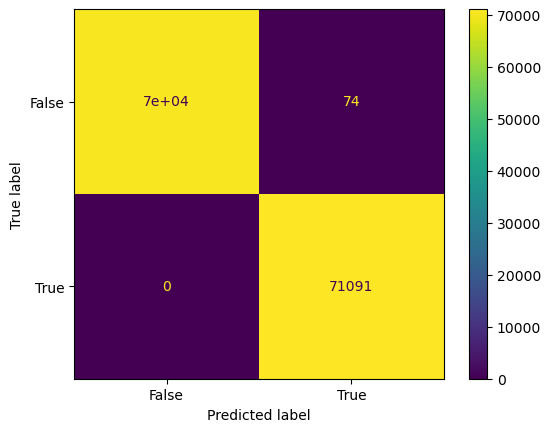

In [136]:
from sklearn import metrics
import matplotlib.pyplot as plt
def display_confusion_matrix(y_test_cbc,y_pred_cbc):
    matrix = metrics.confusion_matrix(y_test_cbc,y_pred_cbc)
    matrixDisplay = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
    matrixDisplay.plot()
    plt.show()
display_confusion_matrix(y_test_cbc,y_pred_cbc)

In [137]:
 print(classification_report(y_test_cbc,y_pred_cbc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     70536
         1.0       1.00      1.00      1.00     71091

    accuracy                           1.00    141627
   macro avg       1.00      1.00      1.00    141627
weighted avg       1.00      1.00      1.00    141627



#### 6.Error Percentage

In [138]:
a=(cbc_ps.shape)
b=pd.DataFrame(a)
c=b.head(1)
c=np.array(c)
Error_Percentage_cbc=(Mean_Sq_Error_cbc/(np.array(c))*100)
print("Error occured in Cat boosting Clasifier =",Error_Percentage_cbc,"%")

Error occured in Cat boosting Clasifier = [[0.05224992]] %


#### 7.Result Percentage

In [139]:
print("Result Percentage=",(100-Error_Percentage_cbc),"%")

Result Percentage= [[99.94775008]] %


#### 8.Conclusion
Well the results of Cat boosting clasifier model is quite good of 99.94775008% accurate, but not as good as Random forest classifier model

## Over all Conclusion

Random forest 99.98234% accurate

XGB model 99.96822% accurate

KNN clasifier model 99.904679% accurate

ADB boosting model 96.434295% accurate

Cat boosting clasifier model 99.94775008% accurate

#### Now we can see that Random forest preforms well compared with others